## Predicting Audience Rating using Linear Regresssion with better accuracy.

### Importing Neccessary Libraries

In [91]:
import numpy as np
import pandas as pd 
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [93]:
!pip install xlrd
!pip install category_encoders

### Reading the dataset

In [95]:
file_path=os.path.join("Rotten_Tomatoes_Movies3.xls")
data = pd.read_excel(file_path)
print(os.getcwd)

<built-in function getcwd>


### Clearing Unwanted Columns

In [97]:
unwanted_columns = ["movie_title","movie_info", "critics_consensus" , "rating" , "in_theaters_date" , "on_streaming_date" , "runtime_in_minutes" , "studio_name"]
data = data.drop(columns=unwanted_columns)

### Handling missing values of numerical columns by adding median into it 

In [99]:
num_cols = ["tomatometer_rating", "tomatometer_count","audience_rating"]
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

### Handling missing values in categorical columns by filling Unknown 

In [101]:
categorical_cols = ["genre","directors", "writers", "cast", "tomatometer_status"]
data[categorical_cols] = data[categorical_cols].fillna("Unknown")

### Encoding neccessary categorical in order to convert into numerical columns

In [104]:
encoder = TargetEncoder()
data['directors'] = encoder.fit_transform(data['directors'], data['audience_rating'])
data['writers'] = encoder.fit_transform(data['writers'], data['audience_rating'])

# Frequency Encoding for 'cast'
data['cast'] = data['cast'].map(data['cast'].value_counts())

### Splitting target column and the other required columns 

In [105]:
X = data[["directors", "writers", "cast","tomatometer_rating", "tomatometer_count"]]
y = data["audience_rating"]

### Splitting the dataset into Train and Test(80/20) Split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using Linear Regression to predeict the model 

In [109]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Calculating the accuracy of the model

In [111]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.7108957356159862
Mean Absolute Error: 8.160567686793245
Mean Squared Error: 117.94331520111535
Root Mean Squared Error: 10.860171048428075


### The below graph shows the graphical result between actual and predicted Values

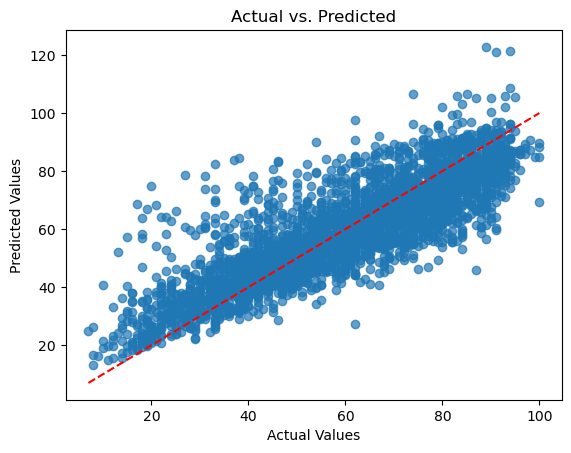

In [113]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')
plt.show()